In [1]:
import xarray as xr
import numpy as np

import cmocean.cm as cm
from matplotlib import pyplot as plt
utorange = (191/255,87/255,0)
utblue  = (0,169/255,183/255)

In [2]:
grid = xr.load_dataset('grid.glob.nc')

In [3]:
display( grid )

<xarray.Dataset> Size: 438MB
Dimensions:  (Y: 444, X: 384, Xp1: 384, Yp1: 444, Z: 100, Zp1: 101, Zu: 100,
              Zl: 100)
Coordinates:
  * X        (X) float64 3kB -0.04166 0.04167 0.125 0.2083 ... 31.71 31.79 31.87
  * Y        (Y) float64 4kB 39.96 40.04 40.12 40.21 ... 76.62 76.71 76.79 76.87
  * Xp1      (Xp1) float64 3kB -0.08333 2.776e-17 0.08333 ... 31.67 31.75 31.83
  * Yp1      (Yp1) float64 4kB 39.92 40.0 40.08 40.17 ... 76.67 76.75 76.83
  * Z        (Z) float64 800B -1.0 -3.0 -5.0 ... -5.625e+03 -5.875e+03
  * Zp1      (Zp1) float64 808B 0.0 -2.0 -4.0 -6.0 ... -5.5e+03 -5.75e+03 -6e+03
  * Zu       (Zu) float64 800B -2.0 -4.0 -6.0 -8.0 ... -5.5e+03 -5.75e+03 -6e+03
  * Zl       (Zl) float64 800B 0.0 -2.0 -4.0 ... -5.25e+03 -5.5e+03 -5.75e+03
Data variables: (12/30)
    Depth    (Y, X) float64 1MB 0.0 0.0 0.0 0.0 0.0 ... 6e+03 6e+03 6e+03 6e+03
    dxC      (Y, Xp1) float64 1MB 7.101e+03 7.101e+03 ... 2.104e+03 2.104e+03
    dxF      (Y, X) float64 1MB 7.101e+03 7.101e+03 ... 2.104e+03 2.104e+03
    dxG      (Yp1, X) float64 1MB 7.106e+03 7.106e+03 ... 2.111e+03 2.111e+03
    dxV      (Yp1, Xp1) float64 1MB 7.106e+03 7.106e+03 ... 2.111e+03 2.111e+03
    dyC      (Yp1, X) float64 1MB 9.264e+03 9.264e+03 ... 9.264e+03 9.264e+03
    ...       ...
    RC       (Z) float64 800B -1.0 -3.0 -5.0 ... -5.625e+03 -5.875e+03
    RF       (Zp1) float64 808B 0.0 -2.0 -4.0 -6.0 ... -5.5e+03 -5.75e+03 -6e+03
    RU       (Zu) float64 800B -2.0 -4.0 -6.0 -8.0 ... -5.5e+03 -5.75e+03 -6e+03
    RL       (Zl) float64 800B 0.0 -2.0 -4.0 ... -5.25e+03 -5.5e+03 -5.75e+03
    drC      (Zp1) float64 808B 1.0 2.0 2.0 2.0 2.0 ... 250.0 250.0 250.0 125.0
    drF      (Z) float64 800B 2.0 2.0 2.0 2.0 2.0 ... 250.0 250.0 250.0 250.0
Attributes: (12/24)
    MITgcm_version:             checkpoint69d
    build_user:                 iescobar
    build_host:                 login4.stampede3.tacc.utexas.edu
    build_date:                 Mon Mar  3 04:11:27 PM CST 2025
    MITgcm_URL:                 http://mitgcm.org
    MITgcm_tag_id:              
    ...                         ...
    Nx:                         384
    Ny:                         444
    Nr:                         100
    history:                    Mon Mar 10 21:57:38 2025: ncks --dbg_lvl=0 -A...
    NCO:                        netCDF Operators version 5.3.2 (Homepage = ht...
    history_of_appended_files:  Mon Mar 10 21:57:38 2025: Appended file grid....

/var/folders/nr/cn91kz512334w8_9vxjtjs8w0000gq/T/ipykernel_62208/1494321287.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3)


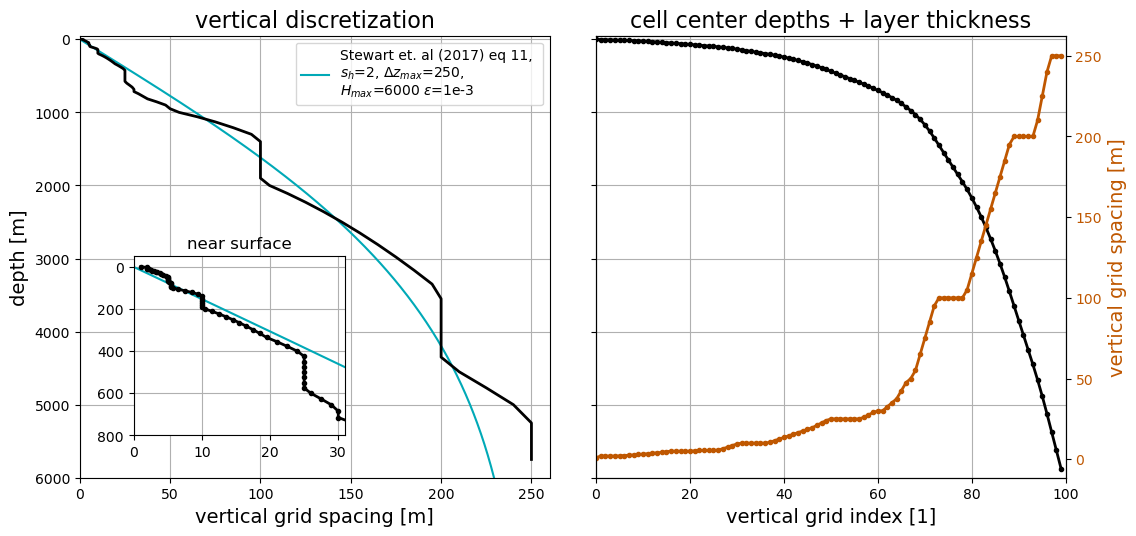

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

z = np.linspace(-6000,0,500)
ax[0].plot(250*np.tanh(-z*np.pi/6000/2) + 1e-3, -z, c=utblue,
           label='Stewart et. al (2017) eq 11, \n$s_h$=2, $\Delta z_{max}$=250, \n$H_{max}$=6000 $\epsilon$=1e-3')
ax[0].plot(grid.drC.values[:-1], -1*grid.Zp1.values[:-1], c='k', lw=2)
ax[0].grid()
ax[0].set_ylim(-50, 6000)
ax[0].set_xlim(0, 260)
ax[0].invert_yaxis()
ax[0].set_ylabel("depth [m]", fontsize=14)
ax[0].set_xlabel("vertical grid spacing [m]", fontsize=14)
ax[0].set_title("vertical discretization", fontsize=16)
ax[0].legend()

# Inset plot
inset_ax = inset_axes(ax[0], width="50%", height="45%", loc='lower left', 
                      bbox_to_anchor=(0.1, 0.08, 0.9, 0.9), bbox_transform=ax[0].transAxes)

inset_ax.plot(250*np.tanh(-z*np.pi/6000/2) + 1e-3, -z, c=utblue)
inset_ax.plot(grid.drC.values[:-1], -grid.Zp1.values[:-1], c='k', lw=2, marker='.')
inset_ax.grid()
inset_ax.set_ylim(-50, 800)
inset_ax.set_xlim(0, 31)
inset_ax.invert_yaxis()
inset_ax.set_title("near surface", fontsize=12)
inset_ax.tick_params(labelsize=10)


# Plot depth (cell centers) on primary y-axis
ax[1].plot(np.arange(len(grid.drC.values[:-1])), -grid.RC.values, c='k', lw=2, marker='.')
ax[1].grid()
ax[1].set_xlim(0, 100)
ax[1].set_ylim(-50, 6000)
ax[1].invert_yaxis()
ax[1].tick_params(labelleft=False)
ax[1].set_xlabel("vertical grid index [1]", fontsize=14)
ax[1].set_title("cell center depths + layer thickness", fontsize=16)

# Add twin y-axis for thickness
ax2 = ax[1].twinx()
ax2.plot(np.arange(len(grid.drC.values[:-1])), grid.drC.values[:-1], c=utorange, lw=2, marker='.')
ax2.set_ylabel("vertical grid spacing [m]", color=utorange, fontsize=14)
ax2.tick_params(axis='y', labelcolor=utorange)

plt.tight_layout(pad=3)
plt.savefig("/Users/ivana/work/regionalgcm/img/bcg.hd_vertical-discretization.png", dpi=180)
plt.show()

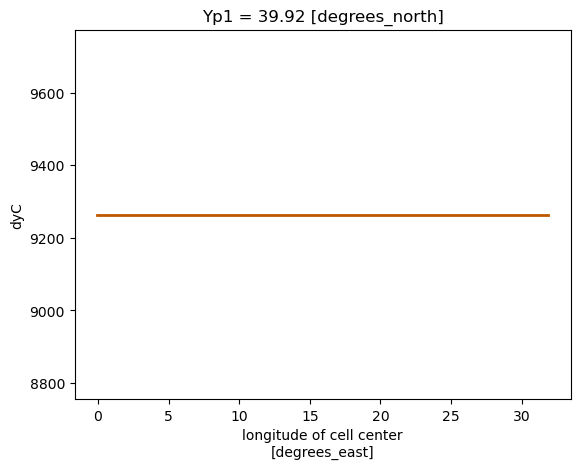

In [13]:
# grid.dxC.isel(Xp1=0).plot(ax=ax, c=utblue, lw=2, label='zonal')
grid.dyC.isel(Yp1=0).plot(c=utorange, lw=2, label='meridional')

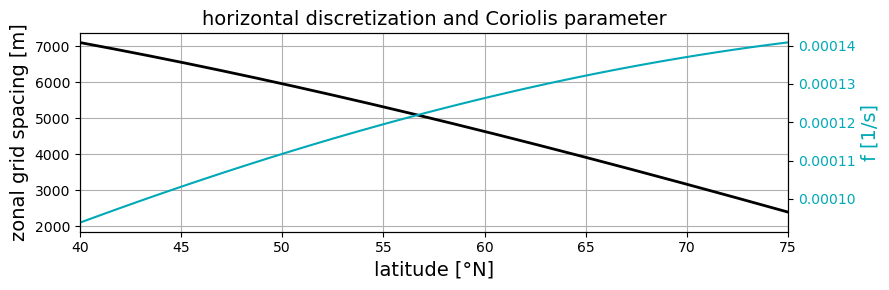

In [42]:
Omega = 2*np.pi / 86164
lats = np.linspace(40,75,100)

fig, ax = plt.subplots(figsize=(9, 3))

# Primary y-axis: dxC vs latitude
grid.dxC.isel(Xp1=0).plot(ax=ax, c='k', lw=2)
ax.set_title('')

# Secondary y-axis: Coriolis parameter vs latitude
ax2 = ax.twinx()
ax2.plot(lats, 2*Omega*np.sin(np.radians(lats)), color=utblue)  # Coriolis parameter f
ax2.set_ylabel("f [1/s]", color=utblue, fontsize=14)
ax2.tick_params(axis='y', labelcolor=utblue)

# Shared x-axis limits
ax.set_xlim(40, 75)
ax.set_xlabel("latitude [°N]", fontsize=14)
ax.set_ylabel("zonal grid spacing [m]", fontsize=14)

ax.grid()
plt.title("horizontal discretization and Coriolis parameter", fontsize=14)

plt.tight_layout()
plt.savefig("/Users/ivana/work/regionalgcm/img/bcg.hd_horizontal-discretization.png", dpi=180)
plt.show()